In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
import warnings
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv('heart.csv')

In [54]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [55]:
df.shape

(303, 14)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [57]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [58]:
df.duplicated().sum()

1

In [59]:
df.drop_duplicates(inplace=True)
print('Number of rows are',df.shape[0], 'and number of columns are ',df.shape[1])

Number of rows are 302 and number of columns are  14


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


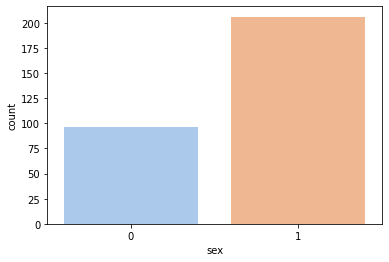

In [61]:
p = sns.countplot(data=df, x="sex", palette='pastel')
plt.show()

#### Number of people having sex 1 is more than twice as much as people having sex 0

<AxesSubplot:xlabel='cp', ylabel='count'>

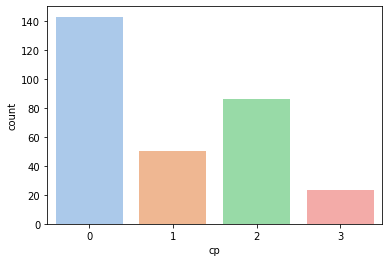

In [62]:
sns.countplot(x='cp', data=df, palette='pastel')

#### People of chest pain category '0' have the highest count, whereas of count of chest pain '3' is the lowest

<AxesSubplot:xlabel='fbs', ylabel='count'>

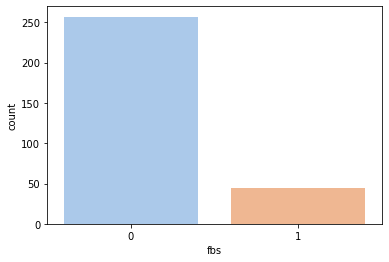

In [63]:
sns.countplot(x='fbs', data=df, palette='pastel')

#### People of fbs category 1 are less than 25% of people of fbs category 0.

<AxesSubplot:xlabel='thall', ylabel='count'>

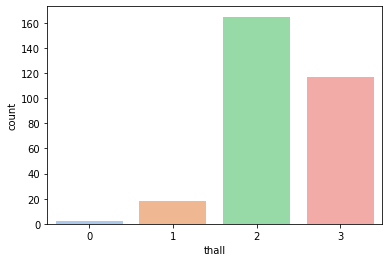

In [64]:
sns.countplot(x='thall', data=df, palette='pastel')

####  Thall count is maximum for type 2 ( 165 ) and min for type 0.

<AxesSubplot:xlabel='restecg', ylabel='count'>

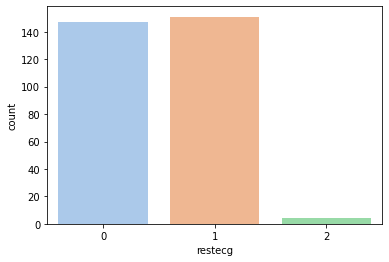

In [65]:
sns.countplot(x='restecg', data=df, palette='pastel')

#### ECG count is almost the same for type 0 and 1. Also, its almost negligible for type 2 in comparision to type 0 and 1.

<AxesSubplot:xlabel='caa', ylabel='age'>

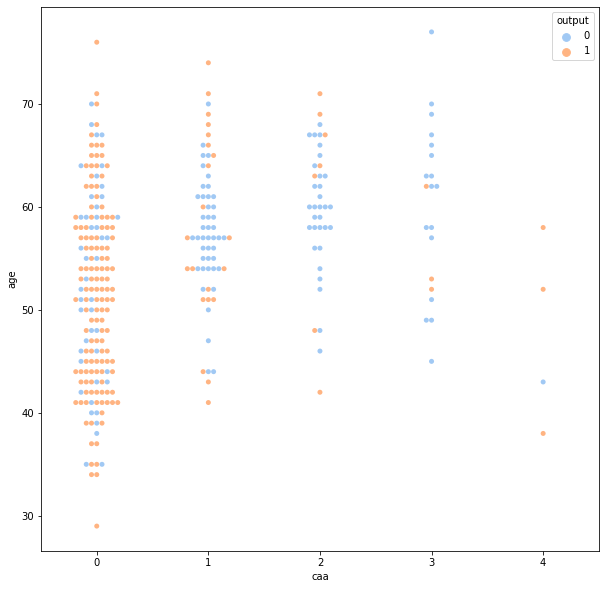

In [66]:
plt.figure(figsize = (10,10))
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='pastel')

#### Accoring to the swarmplot, people belonging to caa category '0' , irrespective of their age are highly prone to getting a heart attack. While there are very few people belonging to caa category '4' , but it seems that around 75% of those get heart attacks. People belonging to category '1' , '2' and '3' are more or less at similar risk.

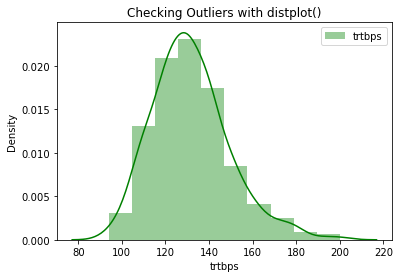

In [67]:
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='green')
plt.legend()

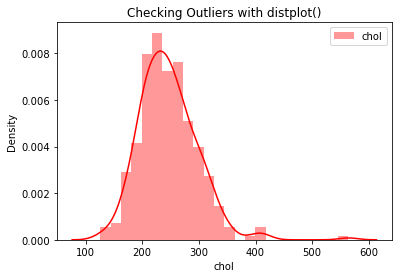

In [68]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df.chol, label='chol', kde=True, color='red')
plt.legend()

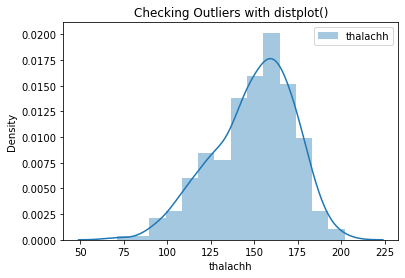

In [69]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df['thalachh'],label='thalachh', kde=True )
plt.legend()

#### trtbps and chol looks like they are normally distributed, with some outliers highly skewed towards right.  In case of thalachh the data is highly skewed towards right!

<AxesSubplot:xlabel='age', ylabel='oldpeak'>

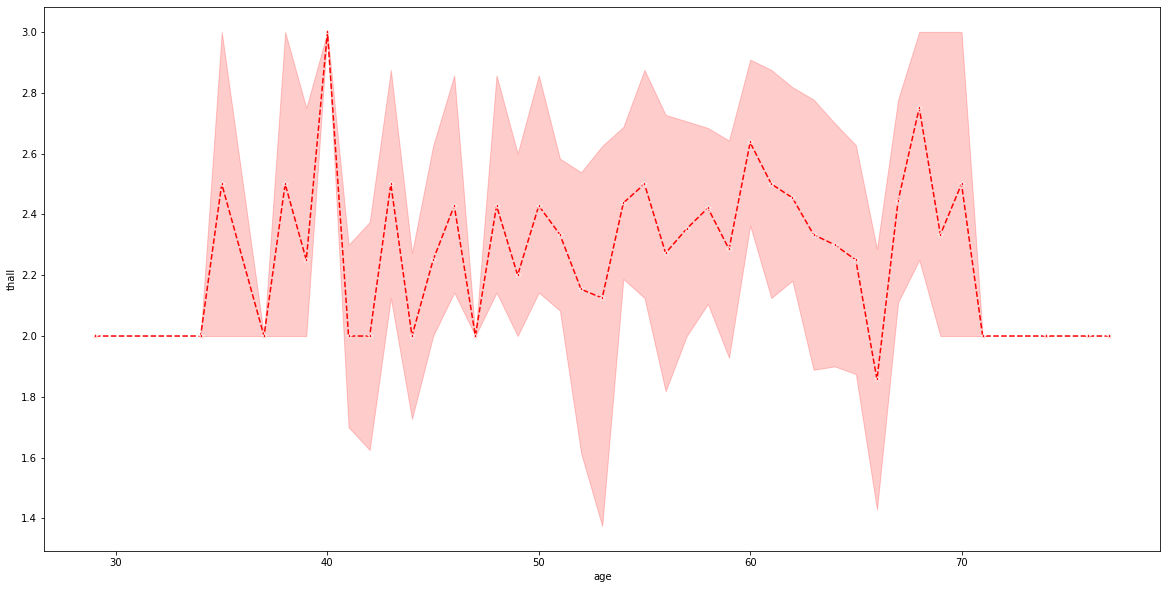

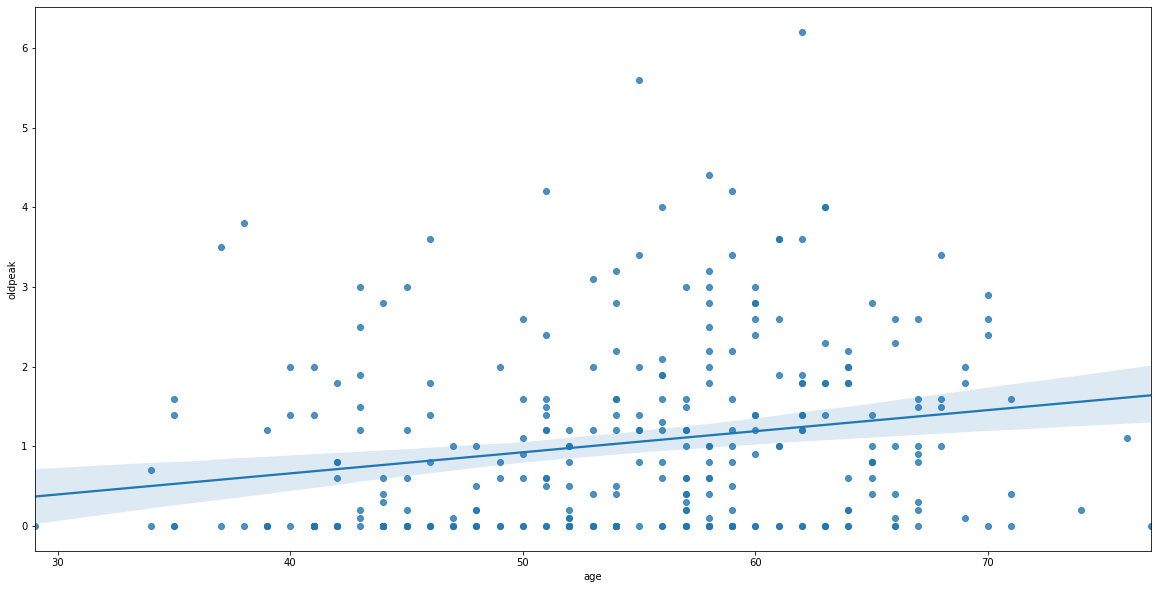

In [70]:
plt.figure(figsize=(20,10))
sns.lineplot(x = df['age'], y = df['thall'],marker = '*', linestyle = '--', color = 'red')

plt.figure(figsize = (20,10))
sns.regplot(x=df['age'],y=df['oldpeak'])

#### The relationship between age-oldpeak and age-thall is highly uncertain and varies significantly.

## Linear Regression

In [71]:
X = df.drop('output', axis = 1)
y = df['output']

In [72]:
df.reset_index(drop=True, inplace=True)

In [73]:
columns_to_scale = df.iloc[:,[0,3,4,7,9,]]
columns_to_scale

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
297,57,140,241,123,0.2
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2


In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ss = StandardScaler()
scaled_values = ss.fit_transform(columns_to_scale)
scaled_values = pd.DataFrame(scaled_values, columns=columns_to_scale.columns)
scaled_values

,age,trtbps,chol,thalachh,oldpeak
0,0.949794,0.764066,-0.261285,0.018826,1.084022
1,-1.928548,-0.091401,0.067741,1.636979,2.118926
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608
4,0.285561,-0.661712,2.080602,0.587366,-0.382092
...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360
299,1.503322,0.707035,-1.035462,-0.374779,2.032684
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360


In [75]:
scaled_df = pd.concat([scaled_values,df.iloc[:,[1,2,5,6,8,10,11,12,13]]],axis=1)
scaled_df

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,3,1,0,0,0,0,1,1
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,2,0,1,0,0,0,2,1
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0,1,0,0,0,2,0,2,1
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,1,0,2,0,2,1
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,0,0,1,1,1,0,3,0
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360,1,3,0,1,0,1,0,3,0
299,1.503322,0.707035,-1.035462,-0.374779,2.032684,1,0,1,1,0,1,2,3,0
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360,1,0,0,1,1,1,1,3,0


In [76]:
clf = LogisticRegression(random_state=3)

In [77]:
X = scaled_df.drop('output', axis = 1)
y = scaled_df['output']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
clf.fit(X_train,y_train)

LogisticRegression(random_state=3)

In [79]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [80]:
clf.score(X_train, y_train)

0.8713692946058091

In [81]:
clf.score(X_test, y_test)

0.8360655737704918

In [82]:
pred = clf.predict(X_test)

In [83]:
from sklearn.metrics import classification_report , confusion_matrix
print( confusion_matrix (y_test , pred))

[[25  4]
 [ 6 26]]


## Confusion matrix

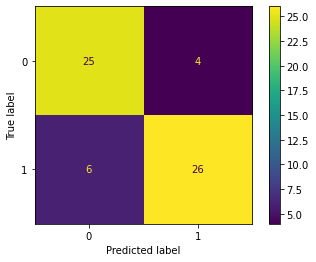

In [84]:
confusion_mat = metrics.confusion_matrix(y_test,pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=clf.classes_)
disp.plot()

In [85]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()

## Precision

In [86]:
Precision_using_sklearn = metrics.precision_score(y_test,pred)
print (Precision_using_sklearn)

0.8666666666666667


## Recall

In [87]:
sensitivity_using_sklearn = metrics.recall_score(y_test,pred)
print (sensitivity_using_sklearn)

0.8125


## F1-Score

In [88]:
F1_Score = metrics.f1_score(y_test,pred)
print (F1_Score)

0.8387096774193549


## Sensitivity

In [89]:
sensitivity_using_formula = (tp)/(tp+fn)
print (sensitivity_using_formula)

0.8125


## Specificity

In [90]:
Specificity_using_formula = (tn) / (tn+fp)
print (Specificity_using_formula)

0.8620689655172413


## Misclassification Rate

In [91]:
error_rate_using_sklearn = 1-metrics.accuracy_score(y_test,pred)
print (error_rate_using_sklearn)

0.16393442622950816


## ROC, AUROC

Text(0.5, 0, 'False positive rate')

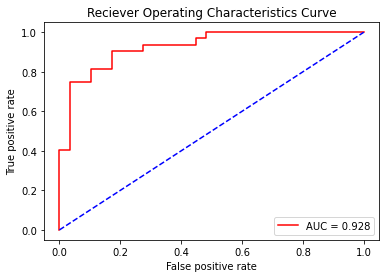

In [92]:
frp,trp, threshold = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
roc_auc_ = auc(frp,trp)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp,trp,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')